In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

path = "../"
sys.path.append(path)

from adaptive_filters.filters import RLSFilter, NLMSFilter
from adaptive_filters.utils import to_history_matrix

N = 5000
n = 4
eps = 1.0
mu = 1E-2
weights = "random"
sigma = 0.1

d = np.sin(np.arange(0, N/10., N/50000.))

# Problem (1)

In [2]:
# Convolve signal d(n) with g(n) = [1.0, 0.5, 0.25, 0.1]
g = [1.0, 0.5, 0.25, 0.1]
x = signal.convolve(d, g, mode="same")

# Convert 1D signal to 2D signal history matrix
xm = to_history_matrix(x, n)[:-1]

y = d.copy()[n:]

print(xm.shape)
print(y.shape)

(4996, 4)
(4996,)


In [3]:
# Fit the adaptive filter
filter = NLSFilter(n=n, mu=mu, eps=eps, w=weights)
y_hat, e, w = filter.fit(xm, y)

100%|██████████| 4996/4996 [00:00<00:00, 65365.30it/s]

Fitting LMS Filter


In [4]:
mse_d = np.mean(np.square(d[n:] - x[n:]))
mse_y = np.mean(np.square(d[n:] - y_hat))

print("Noisy/Original MSE: {:.8f}\n".format(mse_d))
print("Filtered/Original MSE: {:.8f}\n".format(mse_y))
print("Filter Coefficients:\n", w)

Noisy/Original MSE: 0.35573168

Filtered/Original MSE: 0.00011364

Filter Coefficients:
 [-0.53848215  0.31308673  0.58994029  0.16197461]


/Users/icorley/miniconda3/envs/dspenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


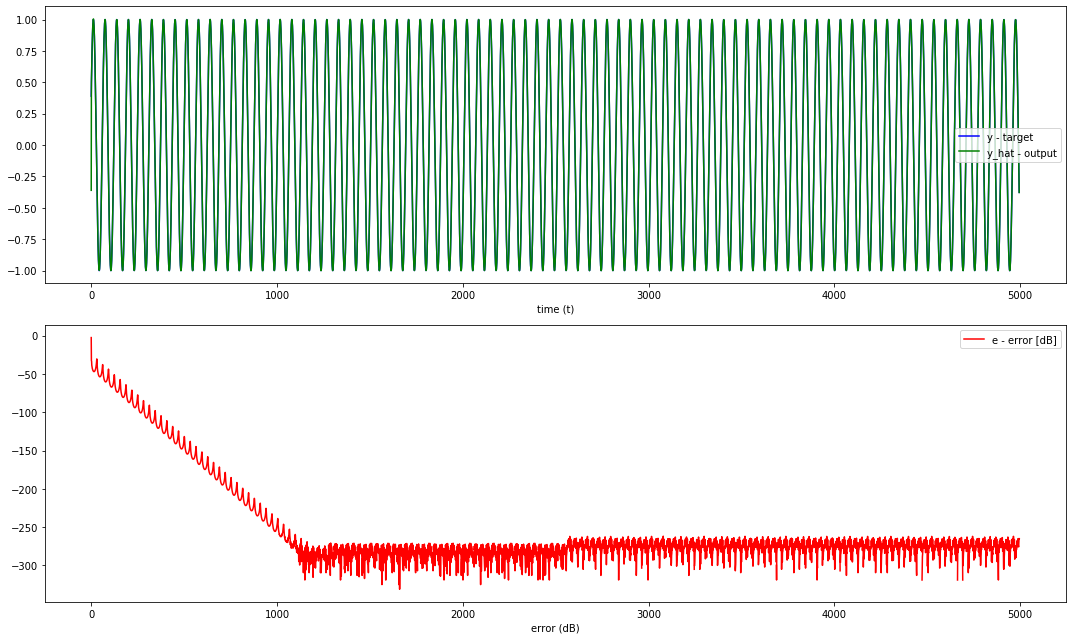

In [5]:
plt.figure(figsize=(15,9))
plt.subplot(211)
plt.xlabel("time (t)")
plt.plot(y, "b", label="y - target")
plt.plot(y_hat,"g", label="y_hat - output")
plt.legend()
plt.subplot(212)
plt.xlabel("time (t)")
plt.xlabel("error (dB)")
plt.plot(10*np.log10(e**2), "r", label="e - error [dB]")
plt.legend()
plt.tight_layout()
plt.show()

# Problem (2)

In [6]:
# Convolve signal d(n) with g(n) = [0.05, 0.1, 1.0, 0.25]
g = [0.05, 0.1, 1.0, 0.25]
x = signal.convolve(d, g, mode="same")

# Convert 1D signal to 2D signal history matrix
xm = to_history_matrix(x, n)[:-1]

y = d.copy()[n:]

print(xm.shape)
print(y.shape)

(4996, 4)
(4996,)


In [7]:
# Fit the adaptive filter
filter = RLSFilter(n=n, mu=mu, eps=eps, w=weights)
y_hat, e, w = filter.fit(xm, y)

100%|██████████| 4996/4996 [00:00<00:00, 65185.35it/s]

Fitting LMS Filter


In [8]:
mse_d = np.mean(np.square(d[n:] - x[n:]))
mse_y = np.mean(np.square(d[n:] - y_hat))

print("Noisy/Original MSE: {:.8f}\n".format(mse_d))
print("Filtered/Original MSE: {:.8f}\n".format(mse_y))
print("Filter Coefficients:\n", w)

Noisy/Original MSE: 0.08638718

Filtered/Original MSE: 0.00009458

Filter Coefficients:
 [-0.8453785   0.28393035  0.48784996  0.74483834]


/Users/icorley/miniconda3/envs/dspenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


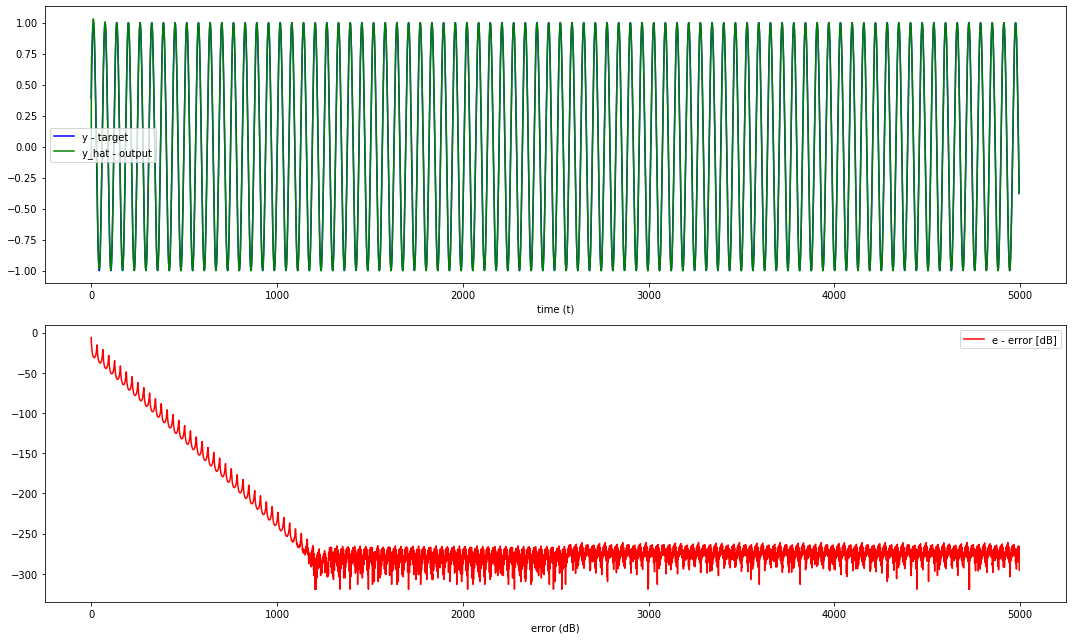

In [9]:
plt.figure(figsize=(15,9))
plt.subplot(211)
plt.xlabel("time (t)")
plt.plot(y, "b", label="y - target")
plt.plot(y_hat,"g", label="y_hat - output")
plt.legend()
plt.subplot(212)
plt.xlabel("time (t)")
plt.xlabel("error (dB)")
plt.plot(10*np.log10(e**2), "r", label="e - error [dB]")
plt.legend()
plt.tight_layout()
plt.show()